In [1]:
import os
os.makedirs('output', exist_ok=True)

import sys
sys.path.append('../')

from utils import load_walksheds, overlay_wks
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

* walskhedbuffer is the Metro station walksheds with overlapping boundaries
* all_boundaries All boundaries for census blocks in MD, DC and VA
* hh is the household income data from ACS. 

In [2]:
wksp5, wksp75 = load_walksheds()
all_boundaries= gpd.read_file('../../Data/Merge Boundaries/MD_DC_VA/Block MD_DC_VA.shp')
hh = gpd.read_file('ACSST5Y2022.S1901-Data.csv')

* select the columns of interest pertaining household income 50k and below
* obtain census tracts level of granularity from all_boundaries
* delete the alpha-numeric header of the pandas df make the first row the header
* get rid of 'US***' from the Geography column

In [3]:
sub_hh = hh[['GEO_ID', 'S1901_C01_002E', 'S1901_C01_002M', 'S1901_C01_003E', 'S1901_C01_003M', 
    'S1901_C01_004E', 'S1901_C01_004M', 'S1901_C01_005E', 'S1901_C01_005M', 
    'S1901_C01_006E', 'S1901_C01_006M']]

In [4]:
all_boundaries['GEOID200'] = all_boundaries['STATEFP20'] + all_boundaries['COUNTYFP20'] + all_boundaries['TRACTCE20']

In [5]:
sub_hh.columns = sub_hh.iloc[0]
sub_hh = sub_hh.iloc[1:]

In [6]:
sub_hh['Geography'] = sub_hh['Geography'].str.rsplit('S').str[1]

In [7]:
sub_hh.head(2)

,Geography,"Estimate Households Total Less than $10,000","Margin of Error Households Total Less than $10,000","Estimate Households Total $10,000 to $14,999","Margin of Error Households Total $10,000 to $14,999","Estimate Households Total $15,000 to $24,999","Margin of Error Households Total $15,000 to $24,999","Estimate Households Total $25,000 to $34,999","Margin of Error Households Total $25,000 to $34,999","Estimate Households Total $35,000 to $49,999","Margin of Error Households Total $35,000 to $49,999"
1,11001000101,0,5.9,0,5.9,2.7,4.4,7.6,10.6,1.8,2.8
2,11001000102,0,2.4,2.6,4.1,3.4,3.7,0.4,0.7,3.9,3.6


* join hh income to all_boundaries dc, md, va
* align walkshed and joined data to the same CRS
* Get all the income estimate range within the walksheds
* save csv data
* generate histogram for MOE

In [8]:
join_subhh_boundary = all_boundaries.merge(sub_hh, left_on='GEOID200', right_on='Geography', how='inner')

In [9]:
join_subhh_boundary = join_subhh_boundary.to_crs('EPSG:4326')

In [10]:
intersect_subhh_stations_p5, intersect_subhh_stations_p75 = overlay_wks(join_subhh_boundary)

intersect_subhh_stations_p5 = intersect_subhh_stations_p5[['Name_1',
                          'Estimate  Households  Total  Less than $10,000',
                         'Margin of Error  Households  Total  Less than $10,000',
                          'Estimate  Households  Total  $10,000 to $14,999',
                           'Margin of Error  Households  Total  $10,000 to $14,999',
                           'Estimate  Households  Total  $15,000 to $24,999',
                           'Margin of Error  Households  Total  $15,000 to $24,999',
                           'Estimate  Households  Total  $25,000 to $34,999',
                           'Margin of Error  Households  Total  $25,000 to $34,999',
                           'Estimate  Households  Total  $35,000 to $49,999',
                           'Margin of Error  Households  Total  $35,000 to $49,999',
                         ]]

intersect_subhh_stations_p75 = intersect_subhh_stations_p75[['Name_1',
                          'Estimate  Households  Total  Less than $10,000',
                         'Margin of Error  Households  Total  Less than $10,000',
                          'Estimate  Households  Total  $10,000 to $14,999',
                           'Margin of Error  Households  Total  $10,000 to $14,999',
                           'Estimate  Households  Total  $15,000 to $24,999',
                           'Margin of Error  Households  Total  $15,000 to $24,999',
                           'Estimate  Households  Total  $25,000 to $34,999',
                           'Margin of Error  Households  Total  $25,000 to $34,999',
                           'Estimate  Households  Total  $35,000 to $49,999',
                           'Margin of Error  Households  Total  $35,000 to $49,999',
                         ]]

In [11]:
intersect_subhh_stations_p5.head(2)

,Name_1,"Estimate Households Total Less than $10,000","Margin of Error Households Total Less than $10,000","Estimate Households Total $10,000 to $14,999","Margin of Error Households Total $10,000 to $14,999","Estimate Households Total $15,000 to $24,999","Margin of Error Households Total $15,000 to $24,999","Estimate Households Total $25,000 to $34,999","Margin of Error Households Total $25,000 to $34,999","Estimate Households Total $35,000 to $49,999","Margin of Error Households Total $35,000 to $49,999"
0,COLLEGE PARK-U OF MD,3.7,2.9,0.6,0.8,4,3.4,2.6,2.5,6.1,4.3
1,COLLEGE PARK-U OF MD,3.7,2.9,0.6,0.8,4,3.4,2.6,2.5,6.1,4.3


In [12]:
for i in intersect_subhh_stations_p5.columns:
    if 'Estimate' in i:
        intersect_subhh_stations_p5[i] = intersect_subhh_stations_p5[i].replace(['-', '**'], np.nan).dropna().astype(float)


for i in intersect_subhh_stations_p75.columns:
    if 'Estimate' in i:
        intersect_subhh_stations_p75[i] = intersect_subhh_stations_p75[i].replace(['-', '**'], np.nan).dropna().astype(float)
    

In [13]:
intersect_subhh_stations_p5['HH_below_50k'] = intersect_subhh_stations_p5['Estimate  Households  Total  $10,000 to $14,999'] + intersect_subhh_stations_p5['Estimate  Households  Total  $15,000 to $24,999'] + intersect_subhh_stations_p5['Estimate  Households  Total  $25,000 to $34,999'] + intersect_subhh_stations_p5['Estimate  Households  Total  $35,000 to $49,999']


In [14]:
intersect_subhh_stations_p75['HH_below_50k'] = intersect_subhh_stations_p75['Estimate  Households  Total  $10,000 to $14,999'] + intersect_subhh_stations_p75['Estimate  Households  Total  $15,000 to $24,999'] + intersect_subhh_stations_p75['Estimate  Households  Total  $25,000 to $34,999'] + intersect_subhh_stations_p75['Estimate  Households  Total  $35,000 to $49,999']


In [15]:
intersect_subhh_stations_p5 = intersect_subhh_stations_p5.groupby(['Name_1'])['HH_below_50k'].sum().reset_index()

In [16]:
intersect_subhh_stations_p75 = intersect_subhh_stations_p75.groupby(['Name_1'])['HH_below_50k'].sum().reset_index()

In [17]:
intersect_subhh_stations_p5.rename(columns={'HH_below_50k':'HH_below_50k_p5'}).to_csv('output/HH_Income_povertylevel_p5.csv', index=False)

In [18]:
intersect_subhh_stations_p75.rename(columns={'HH_below_50k':'HH_below_50k_p75'}).to_csv('output/HH_Income_povertylevel_p75.csv', index=False)

In [19]:
hh_df = pd.read_csv('output/HH_Income_povertylevel_p75.csv')
hh_df.columns

Index(['Name_1', 'HH_below_50k_p75'], dtype='object')

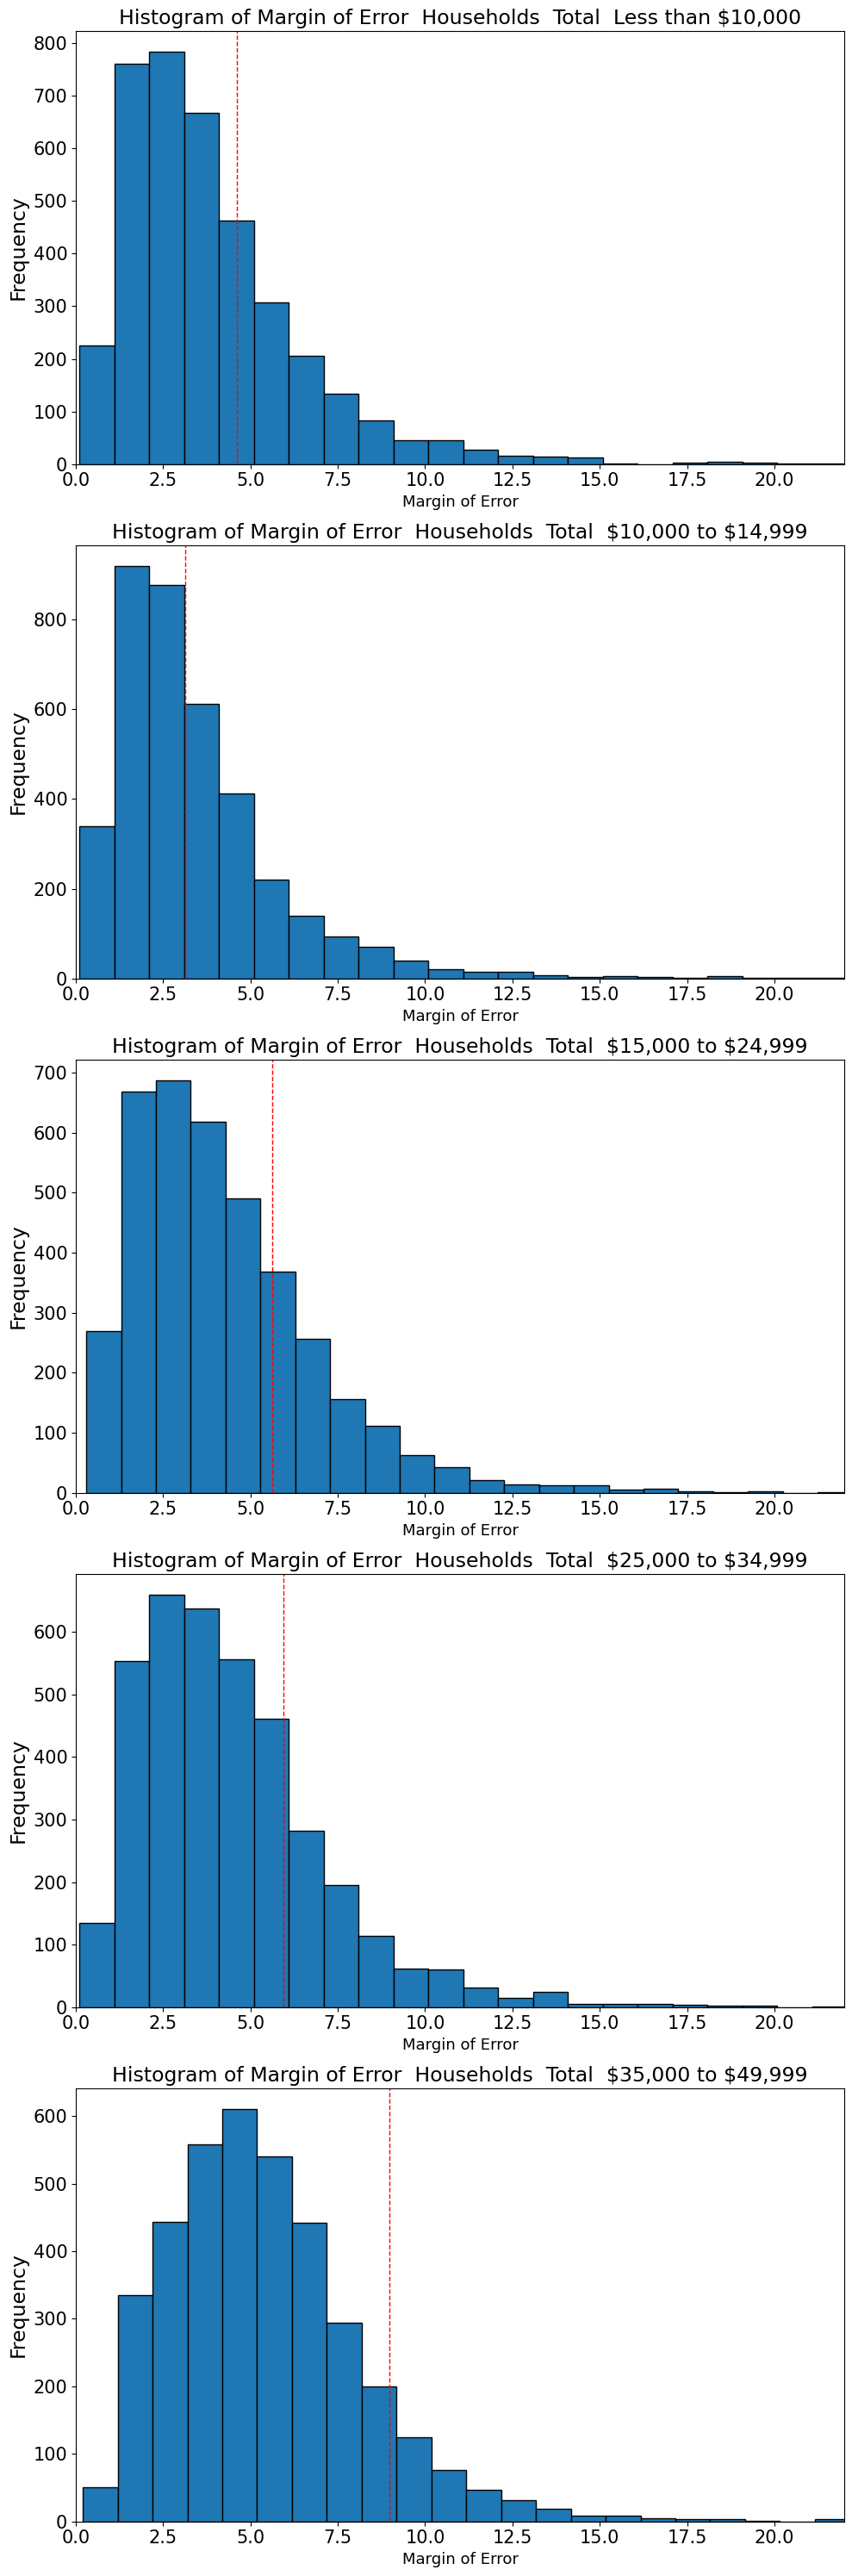

In [20]:
# Identifying the Margin of Error columns
margin_of_error_columns = [col for col in sub_hh.columns if "Margin of Error" in col]
estimate_columns = [col.replace('Margin of Error', 'Estimate') for col in margin_of_error_columns]


# Plotting histograms for each Margin of Error column
plt.figure(figsize=(10, 30))

for i, (error_col, estimate_col) in enumerate(zip(margin_of_error_columns, estimate_columns), 1):
    # Remove non-numeric values and convert to float
    margin_of_error = sub_hh[error_col].replace(['-', '**'], [None, None]).dropna().astype(float)
    mean_estimate = sub_hh[estimate_col].replace(['-', '**'], [None, None]).dropna().astype(float).mean()

    error_col = error_col.replace('$', r'\$')
    
    plt.subplot(len(margin_of_error_columns), 1, i)
    plt.hist(margin_of_error, bins=100, edgecolor='black')
    plt.axvline(mean_estimate, color='red', linestyle='dashed', linewidth=1)
    plt.title(f'Histogram of {error_col}', size='17')
    plt.xlabel('Margin of Error', fontsize='13')
    plt.ylabel('Frequency', fontsize='17')
    plt.xticks(fontsize='15')
    plt.yticks(fontsize='15')
    plt.xlim(0,22)
    

plt.tight_layout()
plt.savefig('histogram MOE.jpg')
plt.show()


